In [2]:
import gspread
from oauth2client.service_account import ServiceAccountCredentials
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
from datetime import timedelta

In [1]:
scopes = [
    'https://www.googleapis.com/auth/spreadsheets',
    'https://www.googleapis.com/auth/drive'
]

creds = ServiceAccountCredentials.from_json_keyfile_name("C:\\Users\\blake\\Downloads\\citrine22-908963bff2f8.json", scopes=scopes)

file = gspread.authorize(creds)
workbook = file.open("Biotech Master Sheet")
sheet = workbook.sheet1

# Read data from Google Sheet
data = sheet.get_all_records()

df = pd.DataFrame(data, columns=["Ticker", "Name", "Current Price($)", "Market Cap ($)"])

# Add new columns to store IPO dates and Possible Lock-up dates
df["IPO Date"] = ""
df["Possible Lock-up"] = ""

# Iterate through the DataFrame and fetch IPO dates
for index, row in df.iterrows():
    ticker_symbol = row["Ticker"]
    try:
        ticker = yf.Ticker(ticker_symbol)
        hist = ticker.history(period="max")
        
        if not hist.empty:
            # Get the oldest date in the historical data, which can be considered as the IPO date
            ipo_date = hist.index.min().strftime('%Y-%m-%d')
            
            # Calculate the Possible Lock-up date (180 days after IPO)
            lockup_date = (pd.to_datetime(ipo_date) + timedelta(days=180)).strftime('%Y-%m-%d')
        else:
            ipo_date = "N/A"
            lockup_date = "N/A"
    except Exception as e:
        print(f"Error for {ticker_symbol}: {e}")
        ipo_date = "N/A"
        lockup_date = "N/A"
    
    df.at[index, "IPO Date"] = ipo_date
    df.at[index, "Possible Lock-up"] = lockup_date

with pd.option_context("display.max_rows", None):
    display(df)


COMPX: No price data found, symbol may be delisted (1d 1924-10-07 -> 2023-09-14)


,Ticker,Name,Current Price($),Market Cap ($),IPO Date,Possible Lock-up
0,JANX,Janux Therapeutics Inc,10.43,481227802.0,2021-06-11,2021-12-08
1,SHPH,Shuttle Pharmaceuticals Holdings Inc,0.68,10660740.0,2022-08-31,2023-02-27
2,SLRN,ACELYRIN Inc,11.02,1071589472.0,2023-05-04,2023-10-31
3,SGMT,Sagimet Biosciences Inc,12,256260000.0,2023-07-17,2024-01-13
4,APGE,Apogee Therapeutics Inc,20.79,1053518535.0,2023-07-14,2024-01-10
5,TSBX,Turnstone Biologics Corp,4.2,95936983.0,2023-07-21,2024-01-17
6,INTS,Intensity Therapeutics Inc,4.91,67190254.0,2023-06-30,2023-12-27
7,TFFP,TFF Pharmaceuticals Inc,0.38,21368016.0,2019-10-25,2020-04-22
8,VVOS,Vivos Therapeutics Inc,0.24,7396836.0,2020-12-11,2021-06-09
9,HARP,Harpoon Therapeutics Inc,5.4,21739557.0,2019-02-08,2019-08-07


COMPX: No price data found, symbol may be delisted (1d 1924-10-07 -> 2023-09-14)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********


1 Failed download:
['COMPX']: ValueError('Naive time - no tzinfo set')



No data available for COMPX between NaT and NaT
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 

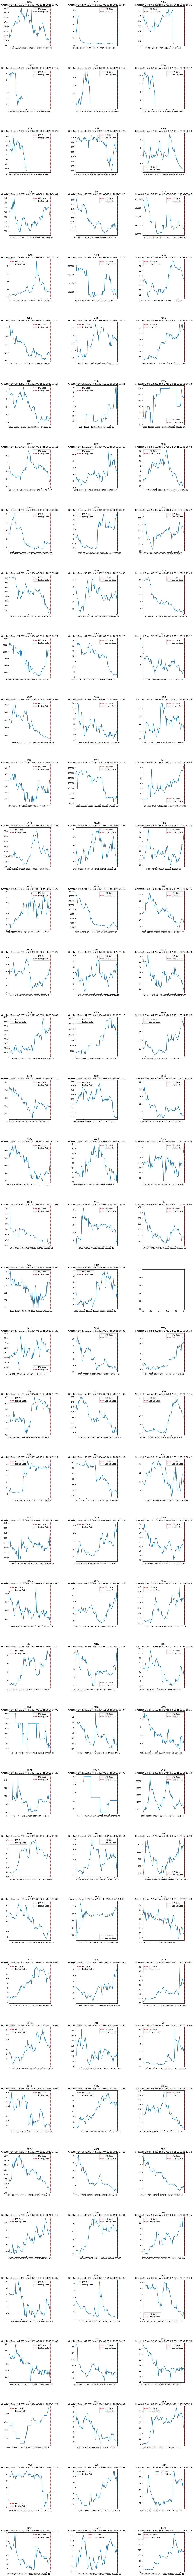

In [3]:
scopes = [
    'https://www.googleapis.com/auth/spreadsheets',
    'https://www.googleapis.com/auth/drive'
]

creds = ServiceAccountCredentials.from_json_keyfile_name("C:\\Users\\blake\\Downloads\\citrine22-908963bff2f8.json", scopes=scopes)

file = gspread.authorize(creds)
workbook = file.open("Biotech Master Sheet")
sheet = workbook.sheet1
data = sheet.get_all_records()
df = pd.DataFrame(data, columns=["Ticker", "Name", "Current Price($)", "Market Cap ($)"])

# Add new columns to store IPO dates and Possible Lock-up dates
df["IPO Date"] = ""
df["Possible Lock-up"] = ""
    
# Iterate through the DataFrame and fetch IPO dates
for index, row in df.iterrows():
    ticker_symbol = row["Ticker"]
    try:
        ticker = yf.Ticker(ticker_symbol)
        hist = ticker.history(period="max")

        if not hist.empty:
            # Get the oldest date in the historical data, which can be considered as the IPO date
            ipo_date = hist.index.min().strftime('%Y-%m-%d')

            # Calculate the Possible Lock-up date (180 days after IPO)
            lockup_date = (pd.to_datetime(ipo_date) + timedelta(days=180)).strftime('%Y-%m-%d')
        else:
            ipo_date = pd.NaT  # Set to NaT
            lockup_date = pd.NaT  # Set to NaT
    except Exception as e:
        print(f"Error for {ticker_symbol}: {e}")
        ipo_date = pd.NaT  # Set to NaT
        lockup_date = pd.NaT  # Set to NaT

    df.at[index, "IPO Date"] = ipo_date
    df.at[index, "Possible Lock-up"] = lockup_date
        
# Calculate the number of rows and columns for subplots
num_stocks = len(df)
cols = 3
rows = -(-num_stocks // cols)  # Ceiling division

# Create subplots
fig, axs = plt.subplots(rows, cols, figsize=(15, 5 * rows))

# Initialize list to store time to drop
time_to_drop = []

def calculate_greatest_drop(stock_data):
    min_value = stock_data['Close'].min()
    max_value = stock_data['Close'].max()
    greatest_drop = 1 - min_value / max_value

    max_drop_date = stock_data['Close'].idxmin()
    max_drop_close = stock_data.loc[max_drop_date, 'Close']

    return greatest_drop, max_drop_date, max_drop_close

for r in range(rows):
    for c in range(cols):
        index = r * cols + c
        if index < num_stocks:
            # Get the stock symbol
            stock_symbol = df.iloc[index]['Ticker']

            # Get the IPO date and lockup date
            ipo_date = pd.to_datetime(df.iloc[index]['IPO Date'])
            lockup_date = pd.to_datetime(df.iloc[index]['Possible Lock-up'])

            # Get stock data
            stock_data = yf.download(stock_symbol, start=ipo_date, end=lockup_date)

            if stock_data.empty:
                print(f"No data available for {stock_symbol} between {ipo_date} and {lockup_date}")
                continue

            # Plot stock data
            axs[r, c].plot(stock_data.index, stock_data['Close'])

            # Set the time zone of stock_data index to match ipo_date
            stock_data.index = stock_data.index.tz_localize(ipo_date.tz)

            # Calculate greatest drop
            greatest_drop, max_drop_date, max_drop_close = calculate_greatest_drop(stock_data)

            # Calculate time to largest drop
            time_to_largest_drop = (max_drop_date - ipo_date).days

            # Append to list
            time_to_drop.append(time_to_largest_drop)

#             # Highlight greatest drop period with a backward line
#             axs[r, c].plot([max_drop_date, stock_data.index[-1]],
#                            [max_drop_close, stock_data['Close'].max()], color="red")

            # Add vertical lines for IPO date and lockup date
            axs[r, c].axvline(x=ipo_date, color="red", linestyle="--", label="IPO Date")
            axs[r, c].axvline(x=lockup_date, color="red", linestyle="--", label="Lockup Date")

            # Set x-axis limits
            axs[r, c].set_xlim(ipo_date, lockup_date)

            # Set title
            axs[r, c].set_title(f"{stock_symbol}\nGreatest Drop: {100 * greatest_drop:.1f}% from {ipo_date.date()} to {lockup_date.date()}")

            # Add legend
            axs[r, c].legend()


# Calculate average time to largest drop
average_time_to_drop = np.mean(time_to_drop)
print("Average time to largest drop from IPO:", average_time_to_drop, "days")

# Adjust layout to prevent overlapping
plt.tight_layout()

# Adjust vertical spacing between subplots
plt.subplots_adjust(hspace=0.6, wspace=0.6)  # Increase or decrease the value as needed

# Show all plots
plt.show()